In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

In [97]:
data = pd.read_csv("/prod.csv")
dat= data.dropna()
dat

,Num1,Num2,Prod
0,0.0,0.0,0.00
1,0.0,0.1,0.00
2,0.0,0.2,0.00
3,0.0,0.3,0.00
4,0.0,0.4,0.00
...,...,...,...
331,1.5,1.6,2.40
332,1.5,1.7,2.55
333,1.5,1.8,2.70
334,1.5,1.9,2.85


In [98]:
X = dat[["Num1","Num2"]]
print(X)

     Num1  Num2
0     0.0   0.0
1     0.0   0.1
2     0.0   0.2
3     0.0   0.3
4     0.0   0.4
..    ...   ...
331   1.5   1.6
332   1.5   1.7
333   1.5   1.8
334   1.5   1.9
335   1.5   2.0

[336 rows x 2 columns]


In [99]:
Y = dat[["Prod"]]
Y

,Prod
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
331,2.40
332,2.55
333,2.70
334,2.85


In [100]:
xtrain, xtest, ytrain, ytest=train_test_split(X, Y, test_size=0.15)

In [101]:
import numpy as np
X = np.array(X)
x = X.reshape(X.shape[0], X.shape[1],1)

In [102]:
xtrain, xtest, ytrain, ytest=train_test_split(X, Y, test_size=0.15)

In [103]:
print(X.shape)
print(xtrain.shape)
print(xtest.shape)

(336, 2)
(285, 2)
(51, 2)


In [104]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(2, 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1, 32)             96        
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2273 (8.88 KB)
Trainable params: 2273 (8.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
model.fit(xtrain, ytrain, batch_size=12,epochs=100, verbose=1)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 5.6322e-05
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 8.2216e-05
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 5.6900e-05
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 7.0575e-05
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 7.9919e-05
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 8.5713e-05
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 8.8522e-05
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 5.0845e-05
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 5.5430e-05
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 5.0856e-05
Epoch 11/100
24/24 [==============================] - 0s 1ms/step - loss: 9.4894e-05
Epoch 12/100
24/24 [==============================] - 0s 1ms/step - loss: 

In [107]:
ypred = model.predict(xtest)

2/2 [==============================] - 0s 3ms/step


In [108]:
print(model.evaluate(xtrain, ytrain))

9/9 [==============================] - 0s 2ms/step - loss: 1.8680e-05
1.867952050815802e-05


In [109]:
print("MSE: %.4f" % mean_squared_error(ytest, ypred))

MSE: 0.0000


In [110]:
T = np.array([1.8,2.1])
t = T.reshape(1,2,1)
t.shape

(1, 2, 1)

In [112]:
product_predicted = model.predict(t)
print(product_predicted)

1/1 [==============================] - 0s 16ms/step
[[3.5340858]]


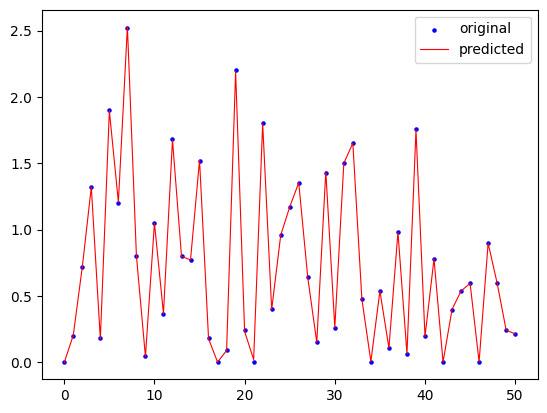

In [113]:
x_ax = range(len(ypred))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()